____
# Exploratory Data Analysis
____
Going through the basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset into a dataframe

In [2]:
books=pd.read_csv("./course_datasets/eda_datasets/datasets/clean_books.csv")

### 1. Initial Exploration
Checking out the dataset. _Applying  various **summarizing methods** to the dataframe_. Can help identify (& address) missing values / fix data types of columns etc.

`.info()` -- summary of data types of a column and also count of non-null (or non-NaN) values across all columns in the dataframe

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [4]:
books.head(2)

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction


`.value_counts()` -- helps answer queries on categorical values in a column. 

Helps to decide which column(s) can be converted to a 'category' data type that'll inturn reduce the memory size of the dataset

In [5]:
books["genre"].value_counts()

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

`.describe()` -- gives a statistical summary of all columns containing all-numeric data values

In [6]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


### 2. Understanding the data distribution
_Understanding how ratings are distributed_. Using histograms & boxplots to gain an understanding of how data is distributed.

From below histograms, its clear that a majority of books have ratings between 4.5 to 4.8 

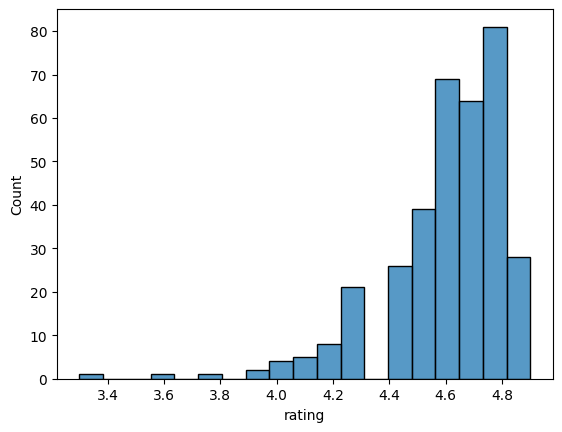

In [7]:
sns.histplot(data=books, x="rating")
plt.show()

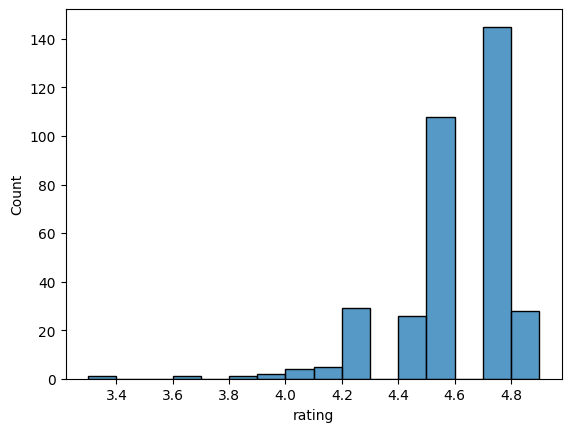

In [8]:
# Setting the binwidth
sns.histplot(data=books, x="rating", binwidth=0.1)
plt.show()

## 3. Data Validation
Essential to know if the data is as expected before we can proceed further into EDA.

`df.dtypes` is used to find out the data type of each column of the dataframe

In [9]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

Use `df["col_name"].astype()` to change the dtype of a dataframe column.

Check if a column's dtype can are as expected using `df["col_name"].isin([`_`list of names to check`_`])`

In [10]:
books["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [11]:
books["genre"].isin(["Fiction", "Non Fiction"]).value_counts()

genre
True     310
False     40
Name: count, dtype: int64

The `~` operator can be used to invert the result of the `.isin` method.

In [12]:
~books["genre"].isin(["Fiction", "Non Fiction"]).value_counts()

genre
True    -311
False    -41
Name: count, dtype: int64

Thus we find there is a third category - 'childrens' in the dataset 

In [13]:
books[~books["genre"].isin(["Fiction", "Non Fiction"])]

,name,author,rating,year,genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
26,Baby Touch and Feel: Animals,DK,4.6,2015,Childrens
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,2017,Childrens
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,2011,Childrens
53,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,2015,Childrens
57,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,2013,Childrens
58,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,2009,Childrens
59,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,2014,Childrens
60,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,2019,Childrens
65,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,2009,Childrens


### Validating data of a particular type:
`df.select_dtypes(`_`"int64"`_`)` -- Filter columns containing (or not containing) particular dtype(s)

In [14]:
books.select_dtypes("number").head(3)

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018


In [15]:
books.select_dtypes("float64").head(3)

,rating
0,4.7
1,4.6
2,4.7


In [16]:
books.select_dtypes(exclude='number')

,name,author,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Childrens
...,...,...,...
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,Non Fiction
348,Wonder,R. J. Palacio,Fiction


### Using statstical methods on numerical columns

In [17]:
books["year"].min()

np.int64(2009)

In [18]:
books["year"].max()

np.int64(2019)

### Advanced stats methods to understand data distribution
Use of boxplots - we can get a sense that most of the books in this dataset were publised between 2010-2016

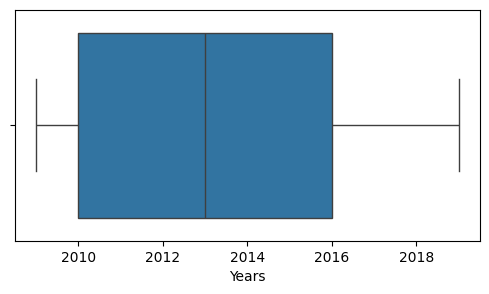

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(data=books, x="year")
plt.xlabel("Years")
plt.show()

Creating further sub-categories gives better overview of the data distribution for each genre.

Most childrens books have been added much recently

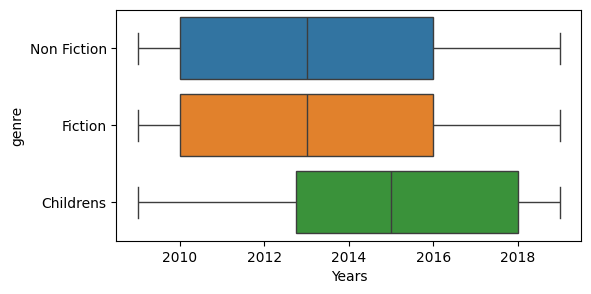

In [20]:
plt.figure(figsize=(6,3))
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.xlabel("Years")
plt.show()

## 4. Data summarization
`df.groupby("`_`groupby_this_col`_`").`_`aggregating_function()`_` -- helps group data by category. 

The aggregating func dictates *HOW* the grouped data (columns wuth numerical dtypes) will be summarized (i.e. mean , median etc.)

The resulting output shows that books from Childrens genre have higher ratings on average .


In [21]:
books[["genre","rating","year"]].groupby(["genre"]).mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [22]:
# Another approach of passing aggregating function -- when multiple agg funcs are to be passed
books[["genre","rating","year"]].groupby(["genre"]).agg(["mean","median"])

rating                year        
                 mean median         mean  median
genre                                            
Childrens    4.780000    4.8  2015.075000  2015.0
Fiction      4.570229    4.6  2013.022901  2013.0
Non Fiction  4.598324    4.6  2013.513966  2013.0

In [23]:
# Using a dict to pass specific aggregations to be applied to each of the columns
books[["genre","rating","year"]].groupby(["genre"]).agg({"rating":"mean","year":"median"})

,rating,year
genre,,
Childrens,4.780000,2015.0
Fiction,4.570229,2013.0
Non Fiction,4.598324,2013.0


The Fiction genre has the highest standard deviation , meaning there is a higher degree of variance in ratings of this genre

In [24]:
# Using a tuple to name each of the specific aggregations on each of the columns
books[["genre","rating","year"]].groupby(["genre"]).agg(mean_rating=("rating","mean"),std_rating=("rating","std"),median_yr=("year","median"))

,mean_rating,std_rating,median_yr
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Adding multiple columns to a `groupby`
Introduces sub-categories. This means the resultant `groupby` output will be multi-indexed. 

In [25]:
# Adding layers to groupby
books[["genre","rating","year"]].groupby(["genre","year"]).agg({"rating":"mean","year":"median"})

rating    year
genre       year                  
Childrens   2009  4.800000  2009.0
            2010  4.800000  2010.0
            2011  4.600000  2011.0
            2012  4.833333  2012.0
            2013  4.633333  2013.0
            2014  4.700000  2014.0
            2015  4.740000  2015.0
            2016  4.833333  2016.0
            2017  4.900000  2017.0
            2018  4.833333  2018.0
            2019  4.812500  2019.0
Fiction     2009  4.561905  2009.0
            2010  4.580000  2010.0
            2011  4.569231  2011.0
            2012  4.353846  2012.0
            2013  4.562500  2013.0
            2014  4.650000  2014.0
            2015  4.320000  2015.0
            2016  4.650000  2016.0
            2017  4.676923  2017.0
            2018  4.585714  2018.0
            2019  4.733333  2019.0
Non Fiction 2009  4.576923  2009.0
            2010  4.539130  2010.0
            2011  4.493750  2011.0
            2012  4.533333  2012.0
            2013  4.607143  2013.0
            2014  4.630000  2014.0
            2015  4.670000  2015.0
            2016  4.687500  2016.0
            2017  4.591667  2017.0
            2018  4.605882  2018.0
            2019  4.676923  2019.0

In [26]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


### Plotting the standard deviation using a bar plot

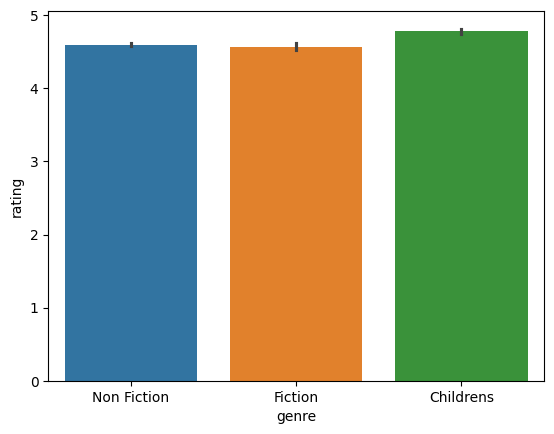

In [27]:
sns.barplot(data=books,x="genre",y="rating",hue="genre")
plt.show()

## 5. Handling missing data
### Strategies to handle missing data
- Drop missing values:
    - As a general thumb rule, when missing values are  5% or less of the total missing values
    - But one needs to decide whether the impact of dropping values is negligible (e.g. on the visualization)
- Account for the missing values using statistical methods such as mean /median etc. or distribution
    - Can be sub-grouped based on the requirement

In [28]:
planes = pd.read_csv("./course_datasets/eda_datasets/datasets/planes.csv")

In [29]:
planes.shape

(10660, 11)

So there *are* NaN values in all columns of the dataset

Also,several columns with date & timestamps can be converted into a dateTime appropriate dtypes. 'Airline' can be categorized

In [30]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [31]:
planes[planes["Price"]==planes["Price"].min()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4058,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759.0
4266,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759.0
4829,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759.0
10490,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759.0


Finding the threshold of the dataframe --columns with missing values below or equal to this value that can be dropped.

In [32]:
# Considering 2% of total column values are NaN values
len(planes) * 0.02
threshold = len(planes) * 0.02
print(threshold)

213.20000000000002


A summary of missing values for all columns

In [33]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

**Finding columns with no. of missing values <= threshold**

In [34]:
planes.isna().sum() <= (len(planes) * 0.02)

Airline            False
Date_of_Journey    False
Source              True
Destination        False
Route              False
Dep_Time           False
Arrival_Time        True
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [35]:
planes.columns[planes.isna().sum() > 0.02]

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [36]:
for_fillna = planes.columns[planes.isna().sum() > 0.02]
print(for_fillna)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [37]:
for col in for_fillna:
    planes["new_col"]=planes[col].fillna(planes[col].mode())

In [38]:
planes["Price"].mode()

0    10262.0
Name: Price, dtype: float64

In [39]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
new_col            616
dtype: int64

In [40]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,new_col
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,11087.0


In [41]:
# finding mean & median ticket prices of each airline
planes.groupby(["Airline"])["Price"].agg(["mean","median","std",("min_price","min"),("max_price","max")]).reset_index()

,Airline,mean,median,std,min_price,max_price
0,Air Asia,5629.657627,5192.0,2016.738954,3383.0,13474.0
1,Air India,9593.015605,9443.0,3865.871975,2050.0,31945.0
2,GoAir,5914.477273,5135.0,2790.815129,3398.0,22794.0
3,IndiGo,5684.994638,5013.0,2266.753552,2227.0,19685.0
4,Jet Airways,11605.228850,11467.0,4230.748840,1840.0,54826.0
5,Multiple carriers,10867.189189,9871.0,3763.674706,5797.0,36983.0
6,SpiceJet,4290.035952,3873.0,1790.851944,1759.0,23267.0
7,Vistara,7831.260970,8028.0,2864.267802,3687.0,21730.0


In [42]:
planes.groupby("Airline")["Price"].median()

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5135.0
IndiGo                5013.0
Jet Airways          11467.0
Multiple carriers     9871.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64

In [43]:
# Adding multi-indexing
planes.groupby(["Source","Airline"])[["Price"]].median()

Price
Source   Airline                   
Banglore Air Asia            4282.0
         Air India           7276.0
         GoAir               4239.0
         IndiGo              4823.0
         Jet Airways         8016.0
         SpiceJet            3971.0
         Vistara             5403.0
Chennai  Air India           4667.0
         IndiGo              3858.0
         SpiceJet            3597.0
         Vistara             6285.5
Delhi    Air Asia            6752.0
         Air India           9653.0
         GoAir               5842.0
         IndiGo              6496.0
         Jet Airways        12898.0
         Multiple carriers  10051.0
         SpiceJet            5583.0
         Vistara             6216.0
Kolkata  Air Asia            4409.0
         Air India          10676.0
         GoAir               7335.0
         IndiGo              4804.0
         Jet Airways        11467.0
         SpiceJet            3873.0
         Vistara             8820.0
Mumbai   Air India           3100.0
         IndiGo              3175.0
         Jet Airways         5678.0
         SpiceJet            2017.0
         Vistara            12395.0

In [44]:
planes["Additional_Info"].value_counts()

Additional_Info
No info                         7867
In-flight meal not included     1874
No check-in baggage included     299
1 Long layover                    18
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

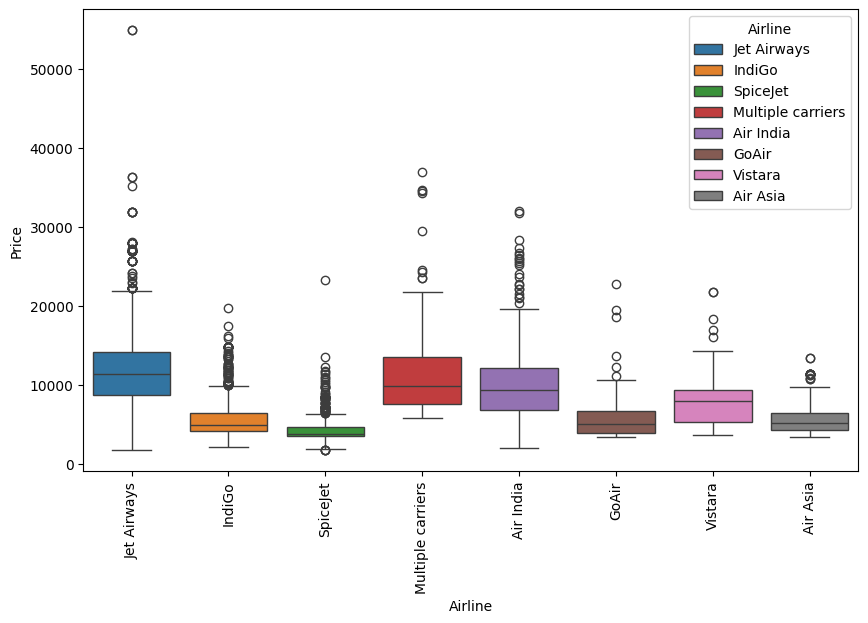

In [45]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=planes, x="Airline", y="Price", hue="Airline")
plt.xticks(rotation=90)
plt.show()

In [46]:
airline_prices = planes.groupby("Airline")["Price"].median()
median_prices_dict = airline_prices.to_dict()
print(median_prices_dict)

{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5135.0, 'IndiGo': 5013.0, 'Jet Airways': 11467.0, 'Multiple carriers': 9871.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


In [47]:
threshold = len(planes) * 0.05
print(threshold)
# Creating a filter of columns to be dropped
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
print(cols_to_drop)

533.0
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')


In [48]:
# checking the NaN value count for each column
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
new_col            616
dtype: int64

In [49]:
# Dropping cols with NAN values below 5% threshold
planes.dropna(subset=cols_to_drop, inplace=True)

In [50]:
# checking the NEW NaN value count for each column
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
new_col            368
dtype: int64

Now all rows with NaN values below threshold values have been dropped. 

NOTE: that `dropna()`'s `how` parameter default i `'Any'` -- meaning an entire row is dropped if any of the values in that row are NaN. 

The `prices` & `Additional__Info` columns still contain NaN values that will have to be handled separately. These columns were not passed in the `cols_to_drop` list since their original NaN value counts exceeded the 5% threshold (these columns had 616 NaN values each).

Removed the calculated column `new_col`

In [51]:
planes.drop("new_col", axis=1, inplace=True)

In [52]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

### Handling missing numerical data:
The missing values in `Price` column will be interpolated with median values of ticket prices for that respective airline.

So we'll first create a dict of median ticket prices `groupby` airline. Then use `map` func to fill each airline median value based on the `Airline` column.

NOTE: that the method to fill missing numerical data will differ based on the context -- time-series data might need interpolation while missing salaries would be better addressed with median salary etc.


In [53]:
planes["Price"].dtype

dtype('float64')

In [54]:
# Filtering all rows where prices are NaN values
planes[planes["Price"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
60,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:45,19:00,10h 15m,1 stop,No info,NaN
76,Jet Airways,15/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 16 Jun,19h 5m,1 stop,In-flight meal not included,NaN
89,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,02:15,13:20,11h 5m,1 stop,No info,NaN
99,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 10 Jun,12h 15m,1 stop,No info,NaN
121,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10531,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,In-flight meal not included,NaN
10571,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,NaN
10578,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,10:20,21:00,10h 40m,1 stop,No info,NaN
10585,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,04:40 13 May,22h 10m,1 stop,In-flight meal not included,NaN


In [55]:
planes.loc[[60,76]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
60,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:45,19:00,10h 15m,1 stop,No info,NaN
76,Jet Airways,15/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 16 Jun,19h 5m,1 stop,In-flight meal not included,NaN


In [56]:
# Creating a dict of airline median ticket prices
median_prices_dict = planes.groupby("Airline")["Price"].median().to_dict()
print(median_prices_dict)

{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}


In [57]:
# filling NaN values with respecitve airline median ticket prices
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(median_prices_dict))

In [58]:
# Checking for few such rows that had NaN prices earlier
planes.loc[[60,76]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
60,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:45,19:00,10h 15m,1 stop,No info,10197.0
76,Jet Airways,15/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 16 Jun,19h 5m,1 stop,In-flight meal not included,11507.0


## Numeric missing values -- When to use ? Which method?

**Statistical Filling (Mean/Median/Mode):**
- Numerical data with roughly normal distribution
- Missing values are random (not systematic)
- You want to preserve the overall distribution
- Small to moderate amount of missing data (<20%)
**Avoid if data contains skewed values, time-series data**

**Forward/Backward Fill:**
- Time series data with temporal continuity
- Sequential data where previous/next values are meaningful
- Stock prices, sensor readings, daily measurements
- Data sorted by time or sequence

**Interpolation:**
- Time series with smooth trends
- Scientific measurements with continuous values
- Missing values between known data points
- Data with mathematical relationships
    df['temperature'].interpolate(moethod)

**Constant Value Fill:**
- Missing values have a specific meaning (e.g., 0 for "none")
- Categorical data with obvious default
- Binary features where missing = False
- Domain knowledge suggests a specific value

**Group-based Fill:**
- Data has meaningful groups/categories
- Missing values likely relate to group characteristics
- Different groups have different typical values
- Hierarchical or nested data structure

______
# 6. Extracting value from categorical data
Using `.value_counts()` , `.nunique()` , `.str` methods

In [59]:
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [60]:
# For finding values containing either 'layor' or 'business' keywords
planes["Additional_Info"].str.contains("layover|business")

0        False
1        False
2        False
3        False
4        False
         ...  
10654    False
10655    False
10656    False
10658    False
10659    False
Name: Additional_Info, Length: 8508, dtype: object

In [61]:
non_numeric = planes.select_dtypes("object")
for each in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Unique values in {each} - {non_numeric[each].nunique()}")


Unique values in Airline - 8
Unique values in Date_of_Journey - 44
Unique values in Source - 5
Unique values in Destination - 6
Unique values in Route - 122
Unique values in Dep_Time - 218
Unique values in Arrival_Time - 1220
Unique values in Duration - 362
Unique values in Total_Stops - 5
Unique values in Additional_Info - 9


There are 362 unique values in the "Duration" column of planes. Instead of converting to numeric data, we ca ncategorize flights by duration & examine the frequency of different flight lengths.

For this, we'll create a "Duration_Category" column in the planes dataframe that will utilize `flight_categories` -- a list ofthe categories AND these will map base on the string values contained in the "Duration" column

In [62]:
# Creating the list of categories based on duration
flight_categories = ["Short-haul","Medium","Long-haul"]

Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.

Create `short_flights` `med_flights` `long_flights` conditions to map into `flight_categories`

In [63]:
# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

In [64]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

Create the "`Duration_Category`" column by calling a function that accepts your `conditions list` and `flight_categories`, setting values not found to "Extreme duration".

In [65]:
planes["Duration_Category"] = np.select(conditions, flight_categories, default="Extreme duration")

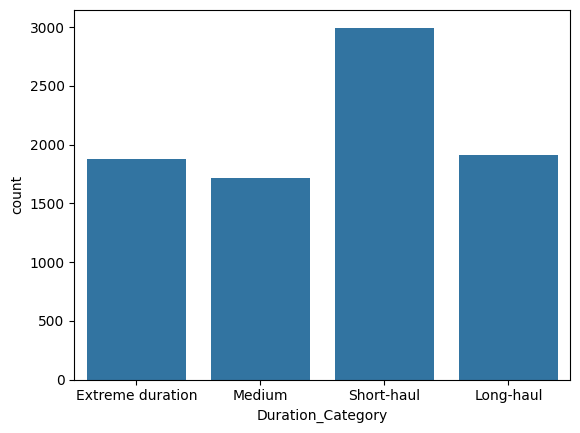

In [66]:
# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [67]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,Long-haul


# 7. Working on numeric data


In [68]:
# Loading a new dataset
salaries = pd.read_csv("./course_datasets/eda_datasets/datasets/ds_salaries_clean.csv")

In [69]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [70]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


### Using `.transform` method:
- Adding columns for standard deviation of salaries based on Experience (rounded to 2 decimal places)

In [71]:
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: round(x.std(),2))
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.88
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.26
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.26
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.88
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.26


Passing multiple values into value_counts() outputs the value count of the combination.

In given dataframe, senior employees' salaries appear to have higher variance in their salaries

In [72]:
salaries[["Experience","std_dev"]].value_counts()

Experience  std_dev  
Senior      55086.26     280
Mid         61014.88     213
Entry       42390.36      88
Executive   111783.58     26
Name: count, dtype: int64

- Adding column for median salary by company size

In [73]:
salaries["median_byCoSize"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x: round(x.median(),2))
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev,median_byCoSize
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.88,95483.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.26,62064.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.26,108076.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.88,62064.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.26,95483.0


### Test Question
Converting the Duration column from string into a float dtype. Challenge here is to convert the minutes into decimal types for the float value to make sense. 

This will have to be done in parts. First format the string form of the duration values. THEN extract the minute part . Then divide by 60 & add to the hours part

In [74]:
planes.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,Long-haul
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,Extreme duration
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,Extreme duration


In [75]:
# replacing multiple characters ("h " and "m") at once
planes["Duration"] = planes["Duration"].replace({"h ":"," , "m":""},regex=True)
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,"5,25",1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,"4,45",1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,"2,25",non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,"15,30",1 stop,In-flight meal not included,11087.0,Long-haul


In [76]:
# Checking if there's still any characters left in the dataframe
planes["Duration"].str.contains("h").value_counts()

Duration
False    7687
True      821
Name: count, dtype: int64

There's 821 rows containing only hours 'h' character. fixing such columns by adding ",0" 

The challenge here is to now fix only those rows of the dataframe that contain the "h" character. 

Use `.loc` with assignment -- This avoids the warning and is the most explicit way

In [77]:
# The incorrect way (tried earlier)
# planes[planes["Duration"].str.contains("h")].replace({"h":""},regex=True, inplace=True)
# planes.head()

In [78]:
# The correct way:
mask = planes["Duration"].str.contains("h")
planes.loc[mask,"Duration"] = planes.loc[mask,"Duration"].str.replace("h",",0")
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,"19,0",2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,"5,25",1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,"4,45",1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,"2,25",non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,"15,30",1 stop,In-flight meal not included,11087.0,Long-haul


In [79]:
# Checking if there's still any characters left in the dataframe
planes["Duration"].str.contains("h").value_counts()

Duration
False    8508
Name: count, dtype: int64

In [80]:
planes["Duration"] = planes["Duration"].str.split(",").apply(lambda x: int(x[0]) + (int(x[1])/60) if len(x) > 1 else int(x[0]))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul


The "Duration" column has been converted into a float dtype now!

Taking a look at all the columns having numeric values now

In [81]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 10659
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            8508 non-null   object 
 1   Date_of_Journey    8508 non-null   object 
 2   Source             8508 non-null   object 
 3   Destination        8508 non-null   object 
 4   Route              8508 non-null   object 
 5   Dep_Time           8508 non-null   object 
 6   Arrival_Time       8508 non-null   object 
 7   Duration           8508 non-null   float64
 8   Total_Stops        8508 non-null   object 
 9   Additional_Info    8208 non-null   object 
 10  Price              8508 non-null   float64
 11  Duration_Category  8508 non-null   object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [82]:
planes["Price_Std"] = planes.groupby("Airline")["Price"].transform(lambda x: round(x.std(),2))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85


In [83]:
planes["Median_Duratn"] = planes.groupby("Airline")["Duration"].transform(lambda x: round(x.median(),2))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85,13.33
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53,2.92
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53,2.92
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90,2.50
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85,13.33


In [84]:
planes["Price_Dstn_Mean"] = planes.groupby("Destination")["Price"].transform(lambda x: round(x.mean(),2))
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn,Price_Dstn_Mean
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85,13.33,10473.59
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53,2.92,9093.62
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53,2.92,11579.31
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90,2.50,9093.62
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85,13.33,11579.31


### Calculating some summary statistics:
Based on summary stats, its observed that Jet Airways has the largest standard deviation in prices, Air India has the largest median of flight durations, and New Delhi is the most expensive destination on average.

In [85]:
planes.groupby("Airline")["Price"].std()

Airline
Air Asia             1979.826234
Air India            3692.609285
GoAir                2764.926625
IndiGo               2245.529140
Jet Airways          4159.846432
Multiple carriers    3558.323763
SpiceJet             1798.900648
Vistara              2888.915498
Name: Price, dtype: float64

In [86]:
planes.groupby("Airline")["Duration"].median()

Airline
Air Asia              2.833333
Air India            15.500000
GoAir                 2.916667
IndiGo                2.916667
Jet Airways          13.333333
Multiple carriers    10.250000
SpiceJet              2.500000
Vistara               3.166667
Name: Duration, dtype: float64

In [87]:
planes.groupby("Destination")["Price"].mean()

Destination
Banglore      9093.622872
Cochin       10473.585927
Delhi         5248.541082
Hyderabad     5190.274021
Kolkata       4907.156863
New Delhi    11579.306944
Name: Price, dtype: float64

# 8. Handling Outliers

<img alt="normal_distribution curve" src= "https://online.stat.psu.edu/public/stat800/lesson04/500%20l1%2025th%20and%2075th%20percentile.png" width="450">
&nbsp; &nbsp;
<img alt="box plot sample" src= "https://www.simplypsychology.org/wp-content/uploads/boxplot.jpg" width="400">

- Use of statistical methods such as `.describe()`, `.mean()`, `.std()`, `.quantile()` etc. to identify outliers. 
- Identify how far apart the minimum, maximum are / relationship between the mean, median values / inter-quartile ranges etc.
- Above statistics can be visualize using boxplots. Histograms, countplots can also be used

In [88]:
# 25% of the data (Salary_USD) lies below this value
print(f"25% of the data (Salary_USD) lies below this value - {salaries["Salary_USD"].quantile(0.25)}")

# 75% of the data (Salary_USD) lies below this value
print(f"75% of the data (Salary_USD) lies below this value - {salaries["Salary_USD"].quantile(0.75)}")



25% of the data (Salary_USD) lies below this value - 59893.0
75% of the data (Salary_USD) lies below this value - 143225.0


### Identifying outliers in the `salaries` dataset:
- Inter-quartile Range (IQR) = `75%ile - 25%ile`
- In a box plot, Upper outliers will be values > `75%ile + (1.5 * IQR)` ; 
- Whereas for lower outliers values < `25%ile - (1.5 * IQR)`

In [89]:
# IQR
iqr_salaries = salaries["Salary_USD"].quantile(0.75) - salaries["Salary_USD"].quantile(0.25)

# Upper limit: 
upper_limit = salaries["Salary_USD"].quantile(0.75) + (1.5 * iqr_salaries)

# Lower limit:
lower_limit = salaries["Salary_USD"].quantile(0.25) - (1.5 * iqr_salaries)


In [90]:
print(upper_limit, lower_limit)

268223.0 -65105.0


In [91]:
salaries["Salary_USD"].min()

np.float64(2730.0)

Filtering the outliers -- i.e the values outside of these limit ranges. 

These are the extreme values in the dataset. Having outliers in the dataset can skew the mean & standard deviation measures

In [92]:
salaries[(salaries["Salary_USD"]< lower_limit)|(salaries["Salary_USD"]>upper_limit)][["Experience","Employee_Location","Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


### What now?
Ask these question when dealing with outliers --
1. Why do these outliers exist? Do they have some commonality between them? 
    
    If so, will these values need to be grouped into a separate category?
2. Do these values _really_ look out of place? Could there be an error during the data collection?
3. If the outlying data needs to be deleted, gauge the impact of deleting these records from the dataset. 
    
    Consider the impact via summary statistics - with & without this data

In [93]:
# Summary statistic considering all values :
salaries["Salary_USD"].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

In [94]:
# Summary statistic considering without the outlier values ie. within the upper & lower limits :
no_outliers = salaries[(salaries["Salary_USD"]> lower_limit) & (salaries["Salary_USD"]<upper_limit)]

In [95]:
print(no_outliers.shape)
print(salaries.shape)

(597, 10)
(607, 10)


In [96]:
no_outliers["Salary_USD"].describe()

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64

Notice : How the removal of merely 10 records significantly lowered the standard deviation & the maximum values in the dataset.

Lets plot a histogram of the two scenarios - data distribution is right-skewed in the original dataframe ; 

while the non-outlier data is relatively less skewed

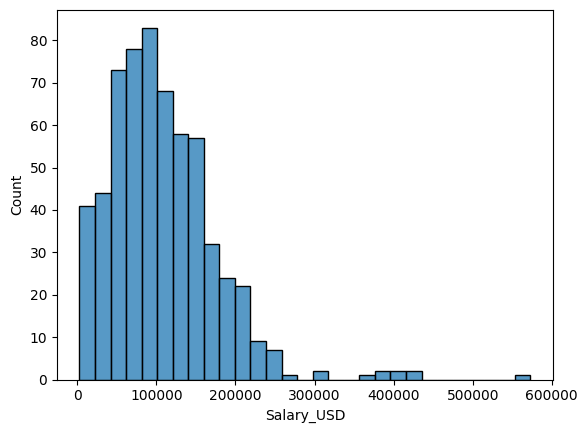

In [97]:
sns.histplot(data=salaries,x="Salary_USD")
plt.show()

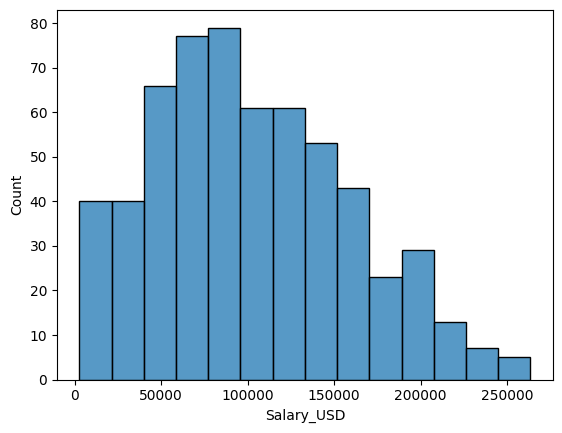

In [98]:
sns.histplot(data=no_outliers, x="Salary_USD")
plt.show()

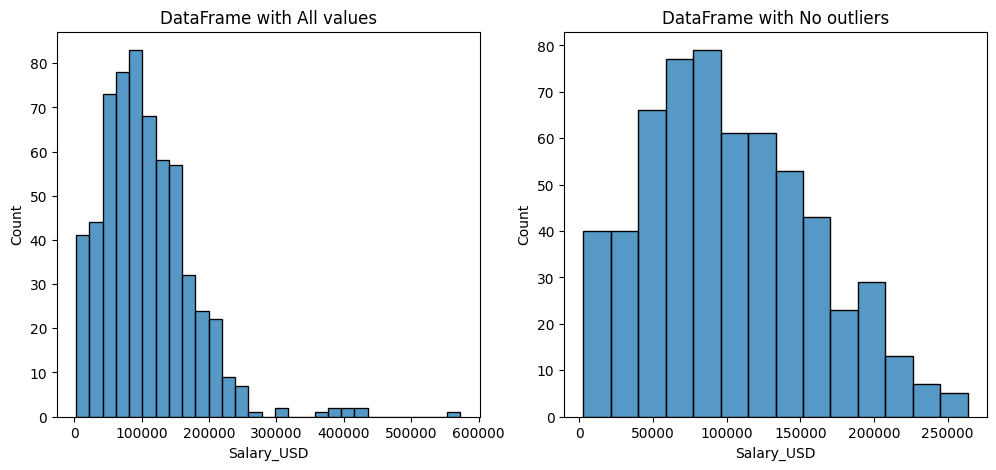

In [99]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))
# First plot
sns.histplot(data=salaries,x="Salary_USD",ax=ax[0])
ax[0].set_title("DataFrame with All values")

# Second plot
sns.histplot(data=no_outliers, x="Salary_USD",ax=ax[1])
ax[1].set_title("DataFrame with No outliers")


plt.show()


_____
### Test Questions
Try to figure out if there are outliers in the "Price" or "Duration" columns of the `planes` DataFrame.

Figure out if there're outliers in the ticket prices using data visualization

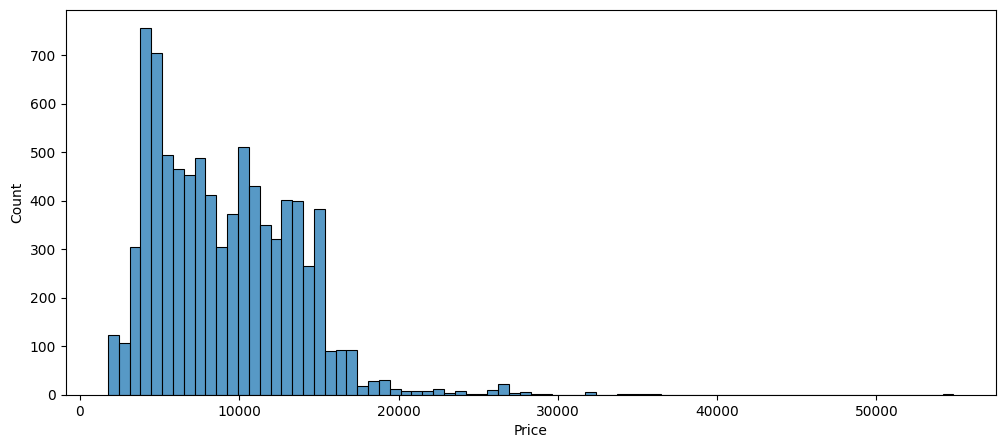

In [100]:
plt.figure(figsize=(12,5))
sns.histplot(data=planes, x="Price")
plt.show()

In [101]:
planes["Price"].describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64

Observations: the data for ticket prices shows a right-skewed distribution.

In [102]:
planes["Duration"].describe()

count    8508.000000
mean       10.730009
std         8.470214
min         1.250000
25%         2.833333
50%         8.666667
75%        15.500000
max        47.666667
Name: Duration, dtype: float64

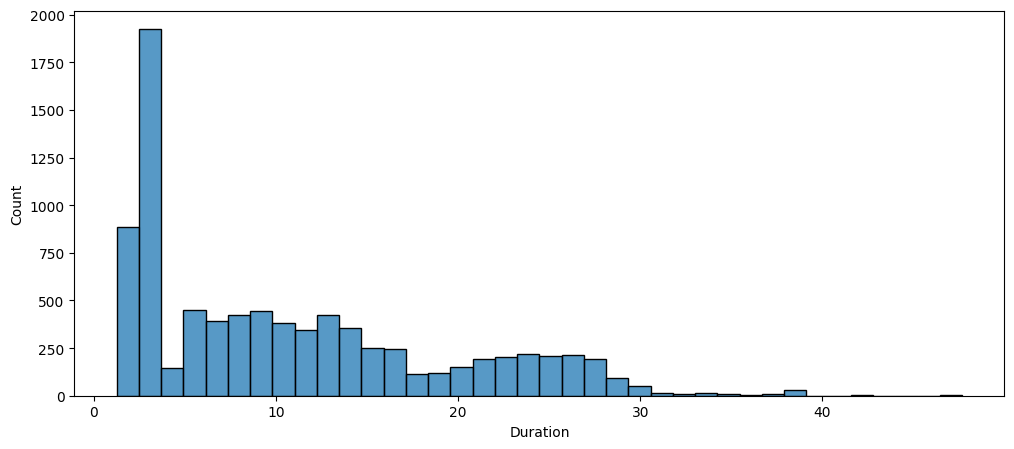

In [103]:
plt.figure(figsize=(12,5))
sns.histplot(data=planes, x="Duration")
plt.show()

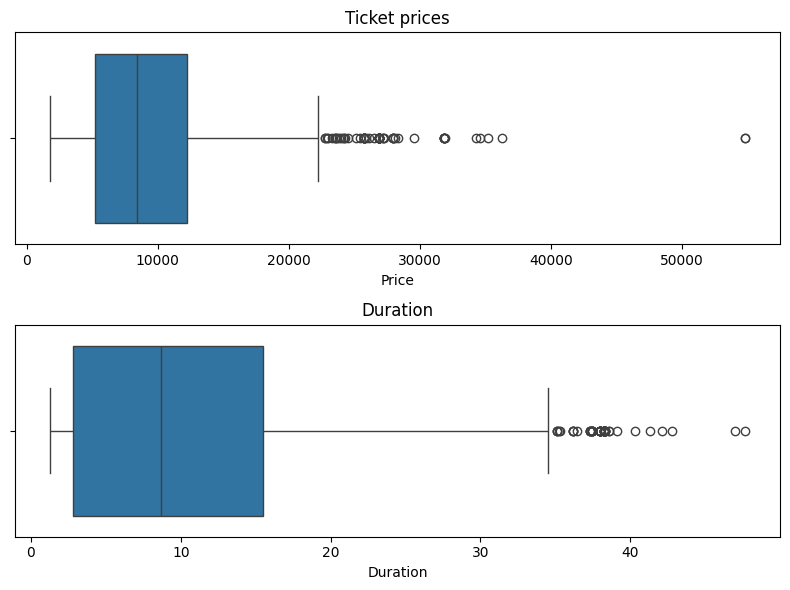

In [104]:
fig,ax = plt.subplots(nrows=2,ncols=1, figsize=(8,6))
# First plot
sns.boxplot(data=planes,x="Price",ax=ax[0])
ax[0].set_title("Ticket prices")

# Second plot
sns.boxplot(data=planes, x="Duration",ax=ax[1])
ax[1].set_title("Duration")

plt.tight_layout()
plt.show()

In [105]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn,Price_Dstn_Mean
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,No info,13882.0,Extreme duration,4159.85,13.33,10473.59
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,No info,6218.0,Medium,2245.53,2.92,9093.62
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,No info,13302.0,Short-haul,2245.53,2.92,11579.31
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.416667,non-stop,No info,3873.0,Short-haul,1798.90,2.50,9093.62
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.500000,1 stop,In-flight meal not included,11087.0,Long-haul,4159.85,13.33,11579.31


**Q: find the ticket prices with the outliers removed**

In [106]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
new_planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


# 8. Relationships in Data
Understanding the relationships across numerical, categorical & DateTime data.  

Exploring the direction & strength of these relationships, as well as ways to visualize them.

**Note** that datetime data is usually interpreted as string Importing a dataset containing columns with datetime dtype. 

In [107]:
# Importing dataset containing datetime objects
divorces = pd.read_csv("./course_datasets/eda_datasets/datasets/divorce.csv")
divorces.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [108]:
divorces.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

## Converting to dateTime object

We notice that date columns were imported as a simple string object. 
- using `parse_dates` parameter of `pd.read_csv`to convert into appropriate dtype (dateTime) **while loading** the dataframe itself.

- Using `pd.to_datetime` to convert a column dtype after it has been imported to a dataframe



In [109]:
# Setting the datetime dtype while loading a dataFrame
divorces = pd.read_csv("./course_datasets/eda_datasets/datasets/divorce.csv", parse_dates=["marriage_date"])
divorces.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [110]:
# Converting dtype after the dataframe was imported
divorces["divorce_date"] = pd.to_datetime(divorces["divorce_date"])
divorces.dtypes

divorce_date         datetime64[ns]
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [111]:
# Converting dtypes for multiple columns
divorces[["dob_man","dob_woman"]] =divorces[["dob_man","dob_woman"]].apply(pd.to_datetime)
divorces.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [112]:
divorces.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


### Accessing date or time atributes from a data value:

In [113]:
# Extracting only the month attribute from the marriage date
divorces["marriage_date"].dt.month


0        6
1        9
2        2
3        5
4        8
        ..
2204     3
2205     3
2206     2
2207    10
2208     8
Name: marriage_date, Length: 2209, dtype: int32

## Visualizing patterns over time

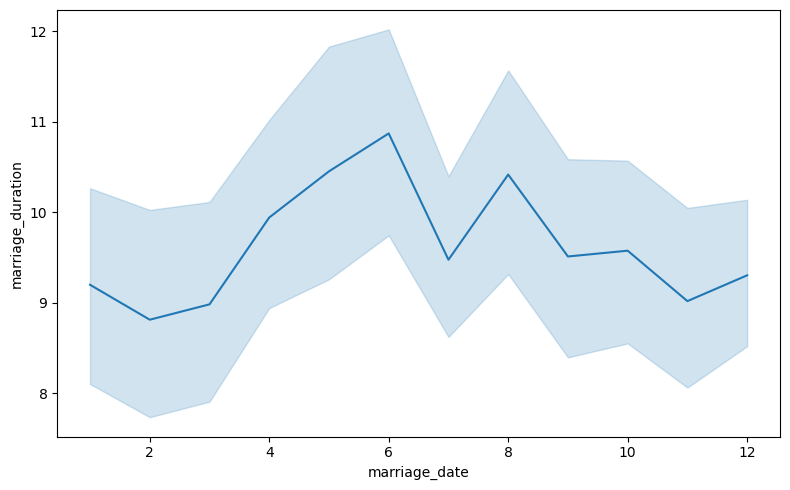

In [114]:
plt.figure(figsize=(8,5))
sns.lineplot(data=divorces, x=divorces["marriage_date"].dt.month , y="marriage_duration")

plt.tight_layout()
plt.show()

We could say marriages from June lasted for longer duration

In [115]:
# Define the marriage_year column
divorces["marriage_year"] = divorces["marriage_date"].dt.year

In [116]:
divorces.head(2)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001


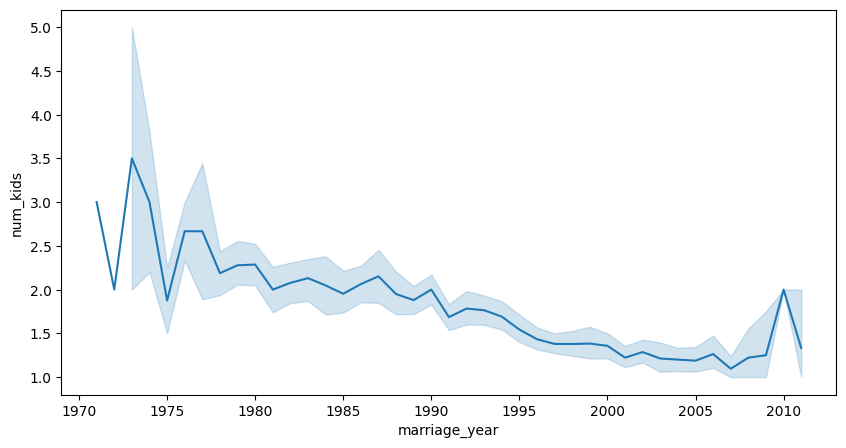

In [117]:
# Create a line plot showing the average number of kids by year
plt.figure(figsize=(10,5))
sns.lineplot(data=divorces, x="marriage_year" , y="num_kids")
plt.show()

Couples with later marriages had fewer children on an average

____
# 9. Correlation
Describes the strength & direction of relationship between two variables
- Values closer to 1 or -1 indicate a strong relationship
- Values closer to 0 indicate weak relationship

In [118]:
divorces.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


### Visualizing  correlation
Using `sns.heatmap` `sns.lineplot` `sns.scatterplot`

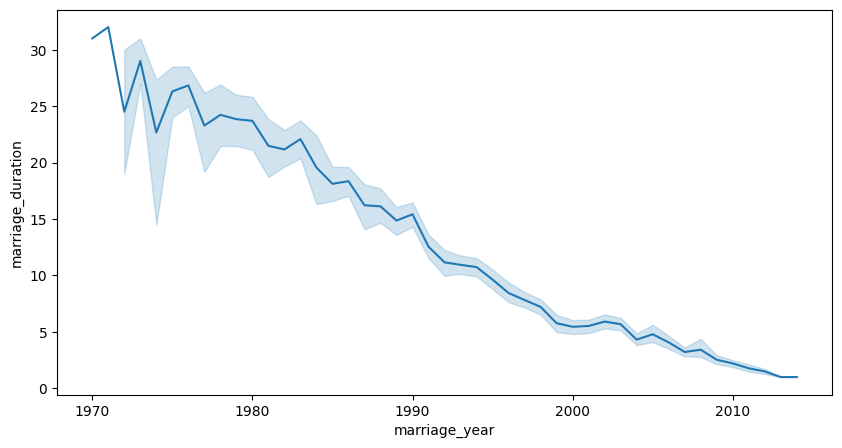

In [119]:
# Create a line plot showing the average number of kids by year
plt.figure(figsize=(10,5))
sns.lineplot(data=divorces, x="marriage_year" , y="marriage_duration")
plt.show()

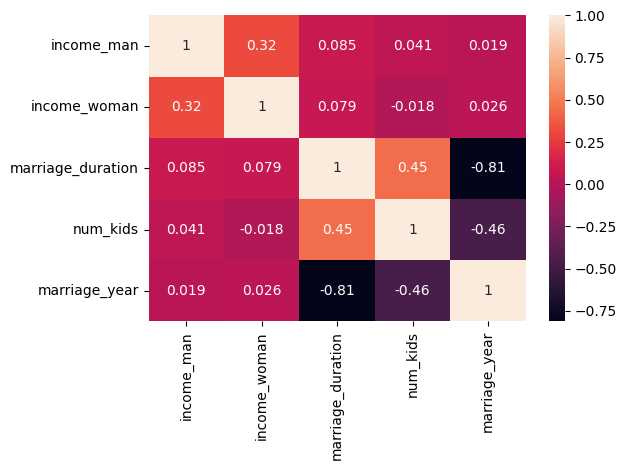

In [120]:
sns.heatmap(divorces.corr(numeric_only=True),annot=True)
plt.tight_layout()
plt.show()

We observe, that marriage_year & duration have strong negative correlation -- as seen in above lineplot as well

### **Some things to note:**
**However context is necessary.**

We need to note that the data set is only for marriages that ended between 2000-2015. **So we cannot form a generalized statement** a one above for all marriages.

Also,the lineplot uses Pearson coefficient that looks for linear relationships. But there could be non-linearity in the data and correlation could still exist. In such cases , the variables could have quadratic relationship & the Pearson co-efficient might not be a correct indicator of the correlation

Basically , a different correlations could be defined by other, non-linear curve equations.

### Using other visualization approaches:
`sns.scatterplot` `sns.pairplot`

Note that in lineplot above, incomes of both men & women shows slight correlations. But lets try to verify it using `sns.scatterplot`

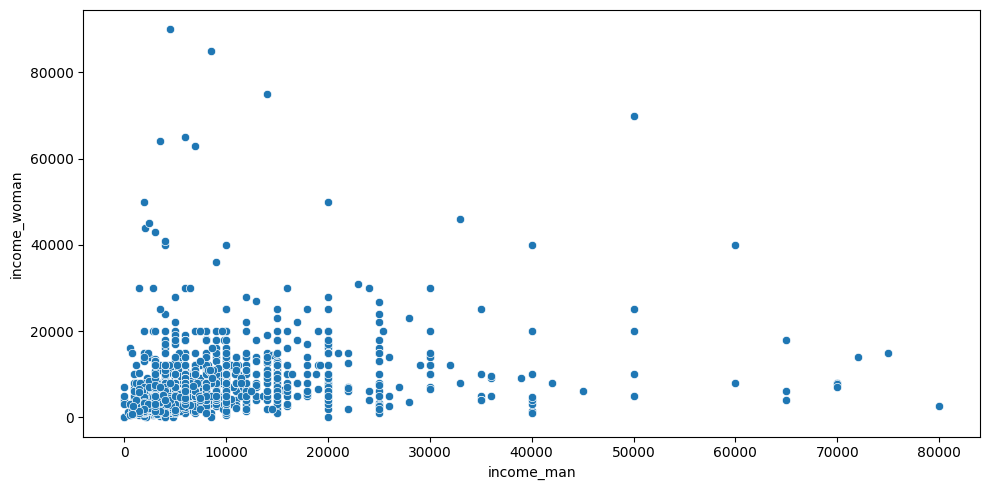

In [121]:
# Create a line plot showing the average number of kids by year
plt.figure(figsize=(10,5))
sns.scatterplot(data=divorces, x="income_man" , y="income_woman")
plt.tight_layout()
plt.show()

So we can observe there is not as strong inlike what the `sns.heatmap` or `sns.lineplot`suggested

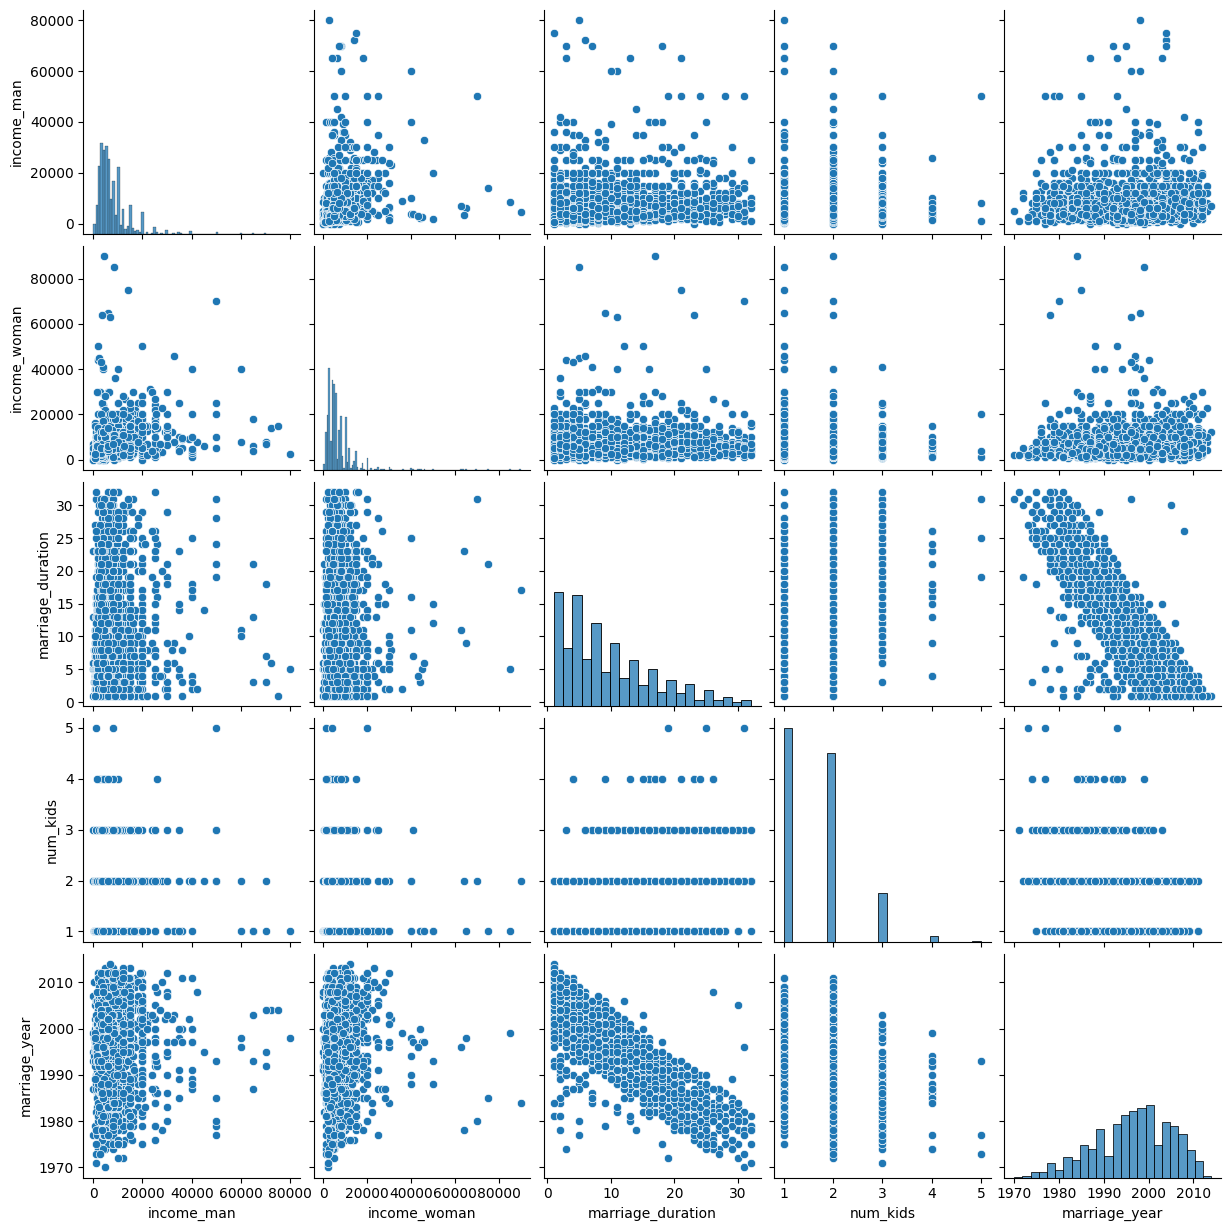

In [122]:
# Using pairplot to get all pairs of correlations in one single view
sns.pairplot(data=divorces)
plt.show()

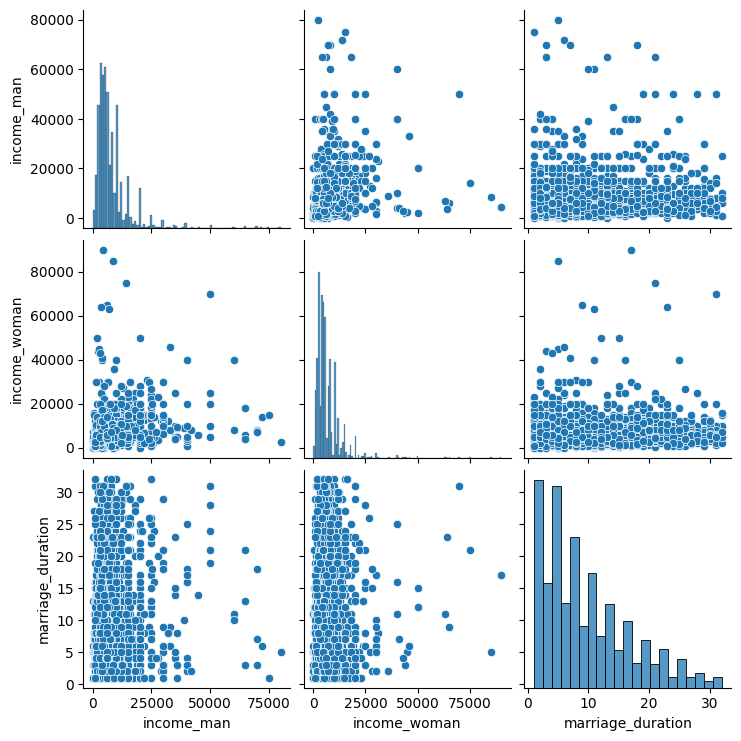

In [123]:
# Instead of all column correlation , we can choose which columns to visualize the correlation for
sns.pairplot(data=divorces, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

AS we can observe, there is relatively weaker correlation amongst the data of these columns than previously suggested by the heatmap

______
### TEST QUESTION
The correlation coefficient between the marriage_duration and num_kids variables is 0.45. Examine this correlation using a scatterplot.

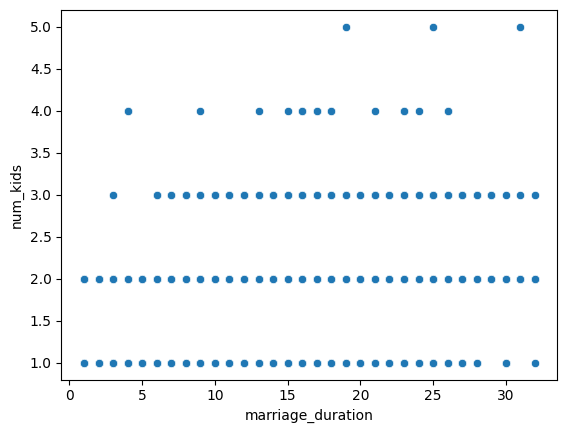

In [124]:
# Create the scatterplot
sns.scatterplot(data=divorces, x="marriage_duration", y="num_kids")
plt.show()

We observe a slight positive relationship in the above scatterplot. 

NOTE that in the dataset, couples with no children have no value in the num_kids column. So these NaN values can be updated to 0 ,which might increase the correlation.

In [125]:
# importing as a new dataframe & then creating the scatterplot again
new_divorces = pd.read_csv("./course_datasets/eda_datasets/datasets/divorce.csv",parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(new_divorces.dtypes)
# Filling NaN valuesin num_kids with 0
new_divorces["num_kids"] = new_divorces["num_kids"].fillna(0)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [126]:
new_divorces.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,0.0
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,0.0
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,0.0


In [127]:
new_divorces.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids
income_man,1.000000,0.318047,0.085321,0.007948
income_woman,0.318047,1.000000,0.078677,-0.004515
marriage_duration,0.085321,0.078677,1.000000,0.574067
num_kids,0.007948,-0.004515,0.574067,1.000000


So we can see the correlation factor has **slightly increased** between marriage_duration & num_kids
______

**Q:  compare the relationship between marriage_duration and income_woman**

<Figure size 1000x500 with 0 Axes>

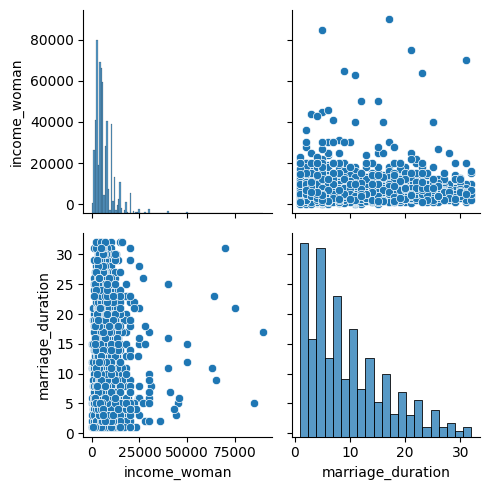

In [128]:
plt.figure(figsize=(10,5))
sns.pairplot(data=divorces, vars=["income_woman" , "marriage_duration"])
plt.tight_layout()
plt.show()

Its observed that the relationship between income_woman and marriage_duration is not a strong one.

# 10. Factor relationships & distributions

Exploring the correlations in categorical variables. 

Categorical variables are harder to summarize numerically, so we often rely on visualizations (e.g. histograms) to explore their relationships .

Example: Exploring the relationship between marriage duration & education level of the man

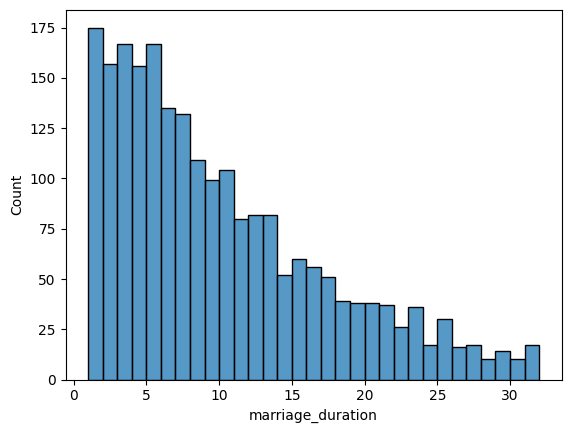

In [129]:
# Plotting the distribution of the marriage duration
sns.histplot(data=divorces, x="marriage_duration", binwidth=1)
plt.show()

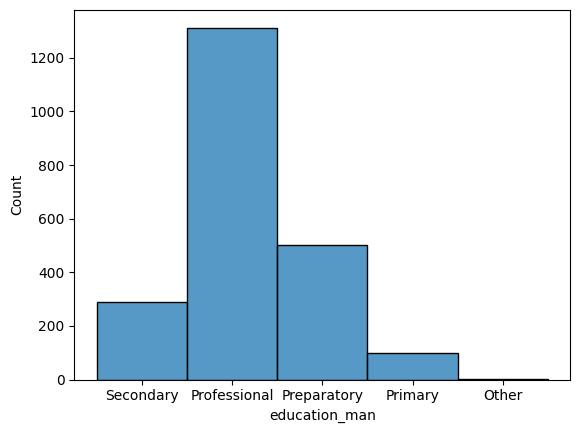

In [130]:
# Plotting the distribution of the marriage duration
sns.histplot(data=divorces, x="education_man", binwidth=1)
plt.show()

Thus its clear that the dataset contains more information on men with professional education as compared to Secondary or Primary level education.

One way to visualize this relationship is to overlay this information on top of the marriagle_duration histogrm created earlier:

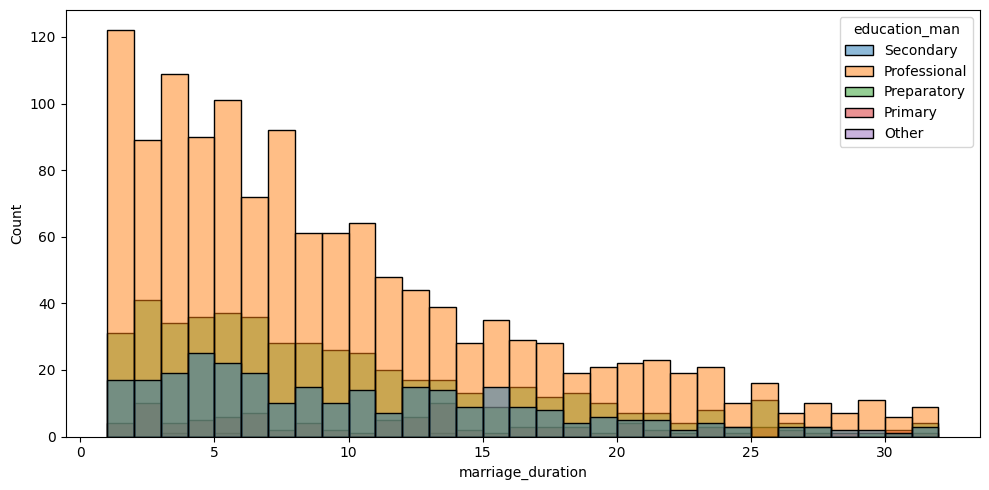

In [131]:
plt.figure(figsize=(10,5))
sns.histplot(data=divorces ,x="marriage_duration", hue="education_man", binwidth=1)
plt.tight_layout()
plt.show()

Above plot is useful to get a sense of proportion of men vs marriage duration. But because the education levels are stacked on top of each other, the relationship between marriage duration and male education level isn't super clear.

We want to visualize the relationship in a way that each distribution is easy to identify.

A histogram is a useful tool for visualization , but doesn't use the available data very efficiently. Kernel density estimation (KDE) is a more efficient tool for the same task
_____
## Kernel Density Estimate (KDE)
Kernel density estimation (KDE) is a statistical technique **used to estimate the probability density function of a random variable**. It creates a smooth curve from discretely sampled data that reflects the underlying density distribution.

We need to control the  `bandwidth` and `kernel` parameters 

A Probability Density Function (PDF) describes the likelihood of a continuous random variable falling within a particular range of values. 

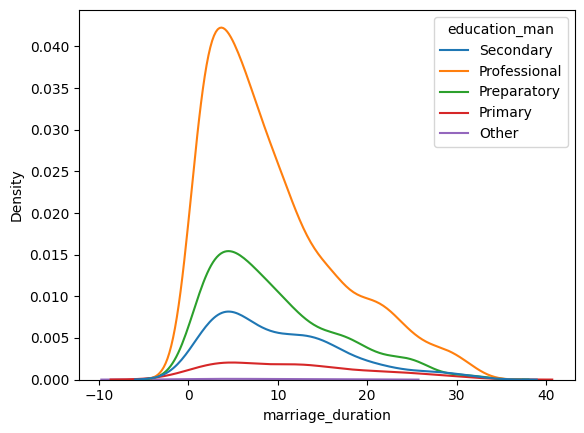

In [132]:
sns.kdeplot(data=divorces, x="marriage_duration", hue="education_man")
plt.show()

However KDE plots are susceptible to invalid values. For example, in above chart, we see that the distribution shows negative value for marriage duration, which cannot be true for duration (no. of years cannot be negative) . S

So we control the starting point of the curve using the  `cut` parameter. Now the curve will be limited to minumum & maximun values of the x-axis column:



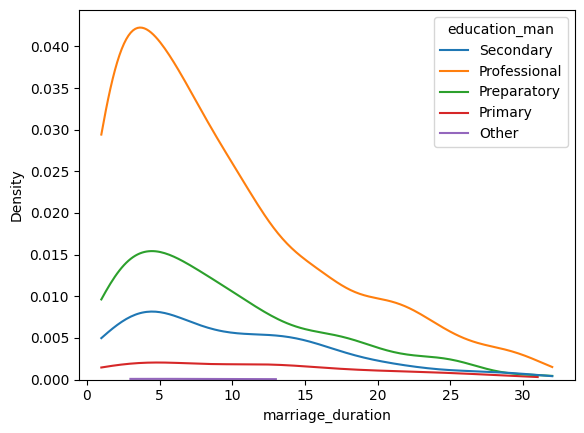

In [133]:
sns.kdeplot(data=divorces, x="marriage_duration", hue="education_man", cut=0)
plt.show()

### Cumulative KDE: shows the cumulative distribution function
Set the `cumulative` argument to True to get the CDF curve - the probability that a value is less than or equal to x-axis value.

Steepness of the curve indicates the CDF (higher probability).

Below plot shows CDF curve for each education group - i.e. the probability of divorce for each education group in men.

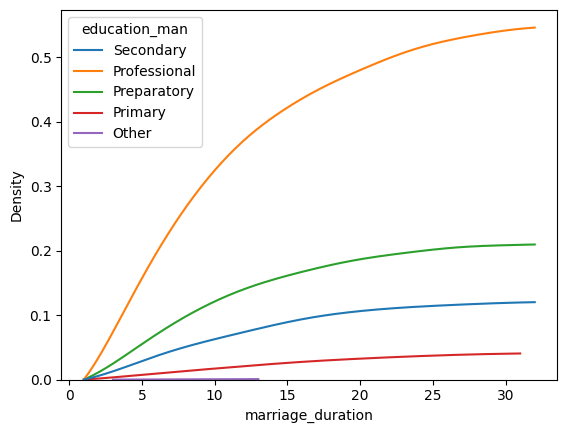

In [134]:
sns.kdeplot(data=divorces, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.show()

There appears to be a relationship between education level and marriage stability. The steeper a curve rises and the higher it goes, the more likely marriages in that group are to end within the observed time period. The gentler, lower curves suggest more marriage stability in those education categories.

Need to explore further -- Is there a relation between marriage age & education level? 

In [135]:
# Generating columns for ages at which the subjects got married:
divorces["marriage_age_men"] = divorces["marriage_year"] - divorces["dob_man"].dt.year
divorces["marriage_age_women"] = divorces["marriage_year"] - divorces["dob_woman"].dt.year

<function matplotlib.pyplot.show(close=None, block=None)>

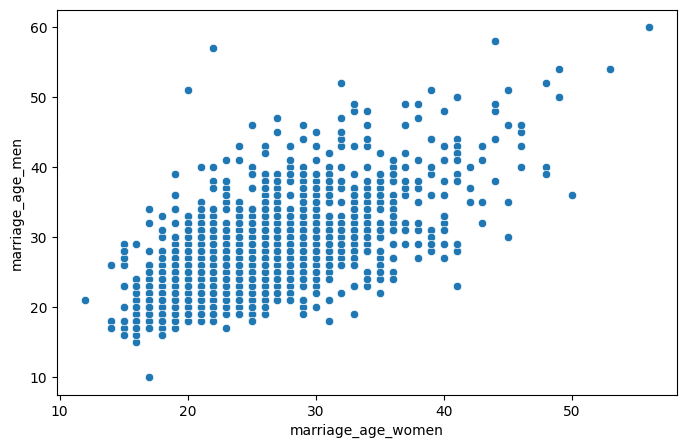

In [136]:
# Plotting the marriage ages:
plt.figure(figsize=(8,5))
sns.scatterplot(data=divorces, x="marriage_age_women" , y="marriage_age_men")
plt.show

It seems there is some positive correlation between the marriage ages. 

Now lets check if we're able to confirm the CDF curve above by trying to add the men's education group into the scatter plot

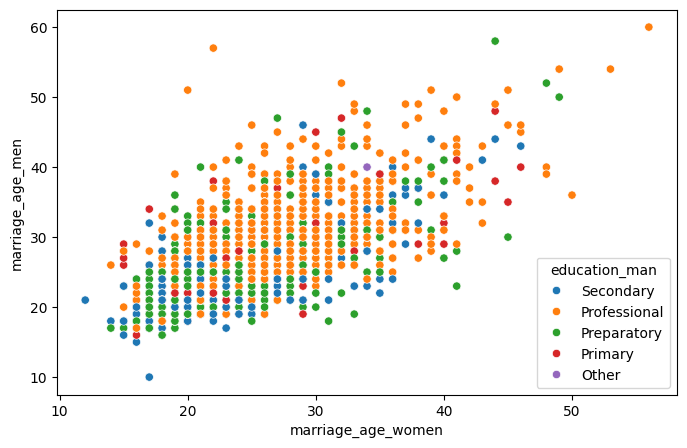

In [137]:
# Plotting the marriage ages:
plt.figure(figsize=(8,5))
sns.scatterplot(data=divorces, x="marriage_age_women" , y="marriage_age_men", hue="education_man")
plt.show()

Its observed that men with professional education tend to get married later.
____
### TEST QUESTIONS
**Q: Now take a look at how women's education and age at marriage relate to other variables**

Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.


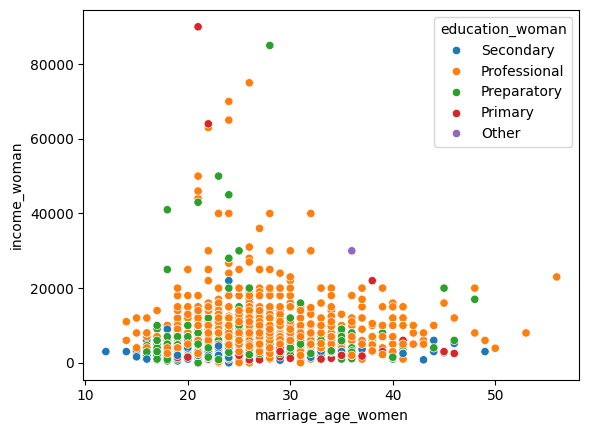

In [138]:
sns.scatterplot(data=divorces, x="marriage_age_women", y="income_woman", hue='education_woman')
plt.show()

The relationship between women's age at marriage and education level is a little less clear, though it looks like there is a positive correlation between professional education and higher salaries

___________
Q: the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

Q: update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.

Q: Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.

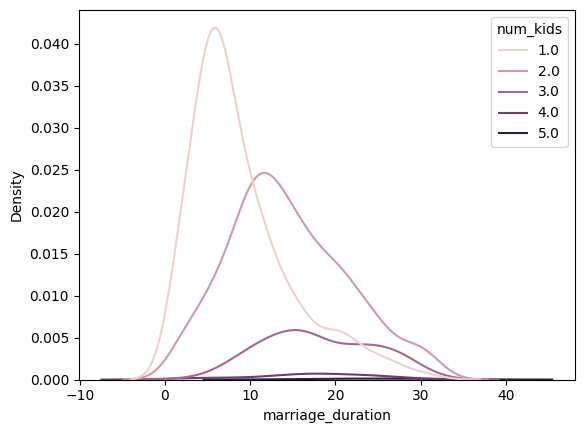

In [139]:
sns.kdeplot(data=divorces, x="marriage_duration" , hue="num_kids")
plt.show()

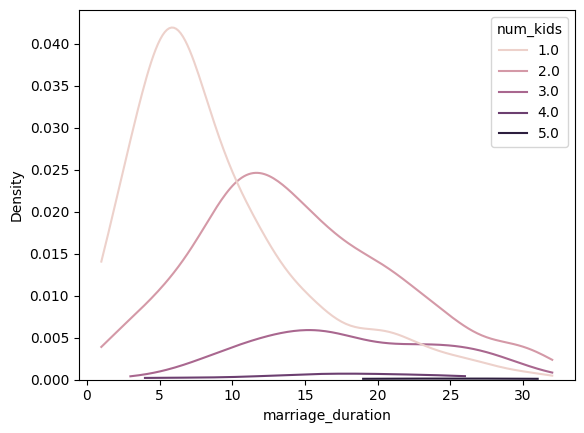

In [140]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorces, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

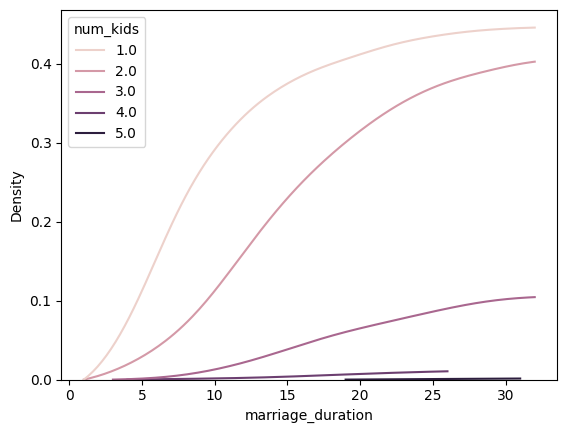

In [141]:
sns.kdeplot(data=divorces, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

We can observe a positive correlation between longer marriages & more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable  (or not) our findings are.

_______
# 11. Turning insights into actions

It is imperative that our dataset be cleaned/ transformed to a sample size that is representative of the overal dataset. This is crucial irrespective of what our intent behind performing the EDA is (could be anbyone of these):
- Detecting patters & relationships
- Generating questions/ hypotheses
- Preparing data for ML models

## Considerations for categorical data:
- Think of categorixal data as labels attached to each record in the dataset.
- **Class Imbalance** occurs when records belonging to one category occur more frequently than others. This could lead to biased results
- **Class frequency**
    - **Relative Class Frequency** -- 
    - **Cross-tabulation** -- `pd.crosstab()` function creating contingency tables, which are used to analyze the relationship between two or more categorical variables. 


The `normalize` argument helps get the relative frequencies of the values in a series (column).

In below example, we see that Cochin accounts for highest (42.7%) of the Destinations ; while Hyderabad accounts for only 6% of the destinations

In [142]:
# Identifying Relative class frequency
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.426775
Banglore     0.269276
Delhi        0.117301
New Delhi    0.084626
Hyderabad    0.066055
Kolkata      0.035966
Name: proportion, dtype: float64

**Cross-tabulation** -- `pd.crosstab()` function creates contingency tables used to analyze the relationship between two or more categorical variables. 

    pd.crosstab(index, columns, values=None, aggfunc=None, normalize=False, margins=False, margins_name='All', dropna=True)

- `index`: Specifies the column(s) or array-like object(s) whose unique values will form the rows of the resulting table
- `columns`: Specifies the column(s) or array-like object(s) whose unique values will form the columns of the resulting table
- `values`: If provided, this column's values will be aggregated based on the intersection of index and columns. This is useful when you want to calculate something other than just counts (e.g., mean, sum).
- `aggfunc`: When values is used, `aggfunc` specifies the aggregation function to apply (e.g., np.mean, np.sum, len).
- `margins`: If set to True, it adds row and column sums (grand totals) to the table.

In example, we can see that Delhi --> Cochin is the most popular route in the given dataset


In [143]:
# Cross-tabulation -- 
pd.crosstab(index=planes["Source"], columns=planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,998,0,0,720
Chennai,0,0,0,0,306,0
Delhi,0,3631,0,0,0,0
Kolkata,2291,0,0,0,0,0
Mumbai,0,0,0,562,0,0


In [144]:
# Cross-tabulation -- with aggregations
pd.crosstab(index=planes["Source"], columns=planes["Destination"], values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10948.0
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3855.5,NaN,NaN


In [145]:
# Another example of crosstab
import pandas as pd

data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Smoker': ['Yes', 'No', 'Yes', 'No', 'No']}
df = pd.DataFrame(data)

# Create a cross-tabulation of Gender and Smoker
cross_tab = pd.crosstab(df['Gender'], df['Smoker'])
df
print(cross_tab)

Smoker  No  Yes
Gender         
Female   2    0
Male     1    2


_____
### TEST QUESTIONS
Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.

**Q: Print the relative frequency of the "Designation" column from salaries DataFrame.**

In [146]:
salaries.head(2)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev,median_byCoSize
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.88,95483.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.26,62064.0


In [147]:
salaries["Designation"].value_counts(normalize=True)

Designation
Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Machine Learning Scientist                  0.013180
Big Data Engineer                           0.013180
Director of Data Science                    0.011532
AI Scientist                                0.011532
Principal Data Scientist                    0.011532
Data Science Consultant                     0.011532
Data Analytics Manager                      0.011532
BI Data Analyst                             0.009885
Computer Vision Engineer                    0.009885
ML Engineer                                 0.009885
Lead Data Engineer                          0.009885
Applied Data Scientist            

We can observe tgat Data Scientist is the most popular designation category 

**Q: Print the relative frequency of the "Job_category" column from salaries DataFrame.** (later)

This requires creation of a `Job_category` column & map words containing keywords. Then call the `value_counts()` method to check the relative frequency of occurrence fo these job categories.

Perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables:

Q: Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".

In [148]:
pd.crosstab(salaries["Company_Size"],salaries["Experience"])

Experience,Entry,Executive,Mid,Senior
Company_Size,,,,
L,29,11,86,72
M,30,12,98,186
S,29,3,29,22


Its observed thst Mid-sized co.s have largest share of employees across all the Experience cateories in the dataset

**Q: Cross-tabulate "Job_Category" and classes of "Company_Size" as column names.**

**Q: Update pd.crosstab() to return the mean "Salary_USD" values.**

Create the Job_Category column for these questions -- **to be done later stage**

In [149]:
# Creating category conditions
# cat_dict = {
#     salaries["Designation"].str.contains("Scientist"),
#     salaries["Designation"].str.contains("Scientist"),
# }

In [150]:
salaries[salaries["Designation"].str.contains("Data Engineer",case=False)]["Designation"].value_counts()

Designation
Data Engineer                   132
Big Data Engineer                 8
Lead Data Engineer                6
Data Engineering Manager          5
Principal Data Engineer           3
Cloud Data Engineer               2
Director of Data Engineering      2
Name: count, dtype: int64

# 12. Feature Generation
Feature Generation in EDA is the process of creating new variables (features) from the existing data to help improve model performance or gain deeper insights.

### How to identify feature requirement: 
Initial step would be to inspect the dtypes, frequencies of each column in a datafram & fix/ cleanse missing/ NaN values. 
**1. Date Feature Extraction** - Breaking down timestamps into meaningful components like day of week, season, and weekend indicators

**2. Mathematical Transformations** - Creating ratios, logarithms, and calculated metrics like BMI or savings rates

**3. Categorical Binning** - Converting continuous variables into meaningful groups for easier analysis

**4. Text Feature Engineering** - Extracting quantitative insights from unstructured text data

**Developing an in-depth domain knowledge alongwith an analytical mindset will be a great help implementing features**




### Test Cleansing +  Converting to appropriate dtypes
For example in planes dataframe, Total_stops column could be easily convertd to numerical dtype & further methods can be applied to this column to get more insights 

In [151]:
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops","")
planes["Total_Stops"] = planes["Total_Stops"].str.replace("stop","")
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop","0")
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-","0")

planes["Total_Stops"] = planes["Total_Stops"].astype(int)

planes["Total_Stops"].dtype

dtype('int64')

Total_stops column is now converted to `int64` dtype from `str` object. 

This conversion can now help in identifying correlation between flight Duration, ticket prices & no. of stops in a flight. 

Visualizing using `sns.heatmap` method for Prices, Duration & Total_stops.

We observe that Total_stops is more strongly correlated to ticket price THAN flight duration to price.

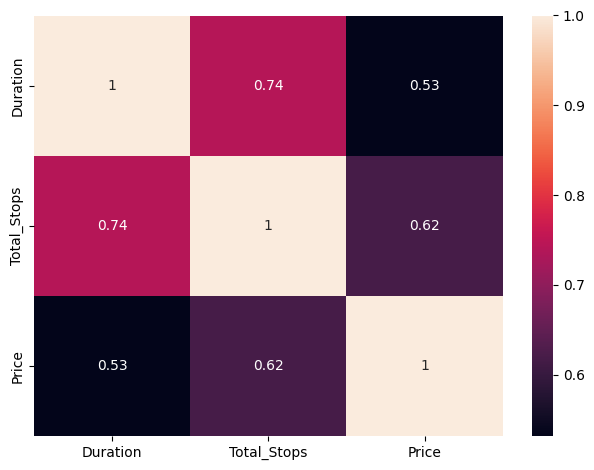

In [152]:
sns.heatmap(planes[["Duration","Total_Stops","Price"]].corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()

### Extracting attributes from dateTime objects
Useful to calculate durations, identify month-wise/ day-wise trends.

Check the variance of ticket prices with respect to month -- which can be extracted form then Date_Of_Journey column

**1.Converting dtype to dateTime for DoJ column**

In [153]:
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"],format= "%d/%m/%Y")
planes.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time                     object
Arrival_Time                 object
Duration                    float64
Total_Stops                   int64
Additional_Info              object
Price                       float64
Duration_Category            object
Price_Std                   float64
Median_Duratn               float64
Price_Dstn_Mean             float64
dtype: object

**2.Adding a `DoJ_month` & `DOJ_weekday` columns as part of feature generation**
Weekday is assigned from 0 (Monday) - 6 (Sunday)

In [154]:
planes.insert(2,"DOJ_month",planes["Date_of_Journey"].dt.month)
planes.insert(3,"DOJ_weekday",planes["Date_of_Journey"].dt.weekday)

planes.head(2)

,Airline,Date_of_Journey,DOJ_month,DOJ_weekday,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn,Price_Dstn_Mean
0,Jet Airways,2019-06-09,6,6,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2,No info,13882.0,Extreme duration,4159.85,13.33,10473.59
1,IndiGo,2019-05-12,5,6,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1,No info,6218.0,Medium,2245.53,2.92,9093.62


**3.Adding columns for departure & Arrival hours**

In [155]:
# Converting Dep_time and Arrival_timeto datetime dtype
time_subset = ["Dep_Time","Arrival_Time"]
for eachCol in time_subset:
    planes[eachCol]=pd.to_datetime(planes[eachCol])


C:\Users\ABHIJEET.BHAMBERE\AppData\Local\Temp\ipykernel_4832\1019408226.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  planes[eachCol]=pd.to_datetime(planes[eachCol])
C:\Users\ABHIJEET.BHAMBERE\AppData\Local\Temp\ipykernel_4832\1019408226.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  planes[eachCol]=pd.to_datetime(planes[eachCol])


In [159]:
planes.insert(8,"Dep_Hr",planes["Dep_Time"].dt.hour)
planes.insert(10,"Arr_Hr",planes["Arrival_Time"].dt.hour)

planes.head(2)

,Airline,Date_of_Journey,DOJ_month,DOJ_weekday,Source,Destination,Route,Dep_Time,Dep_Hr,Arrival_Time,Arr_Hr,Duration,Total_Stops,Additional_Info,Price,Duration_Category,Price_Std,Median_Duratn,Price_Dstn_Mean
0,Jet Airways,2019-06-09,6,6,Delhi,Cochin,DEL → LKO → BOM → COK,2025-07-22 09:25:00,9,2025-06-10 04:25:00,4,19.000000,2,No info,13882.0,Extreme duration,4159.85,13.33,10473.59
1,IndiGo,2019-05-12,5,6,Kolkata,Banglore,CCU → NAG → BLR,2025-07-22 18:05:00,18,2025-07-22 23:30:00,23,5.416667,1,No info,6218.0,Medium,2245.53,2.92,9093.62


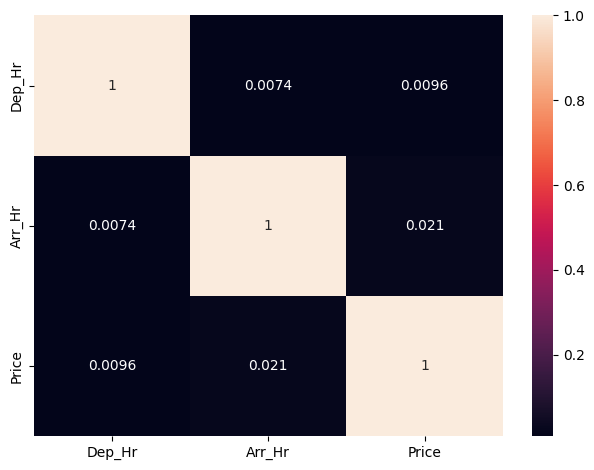

In [162]:
sns.heatmap(planes[["Dep_Hr","Arr_Hr","Price"]].corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()

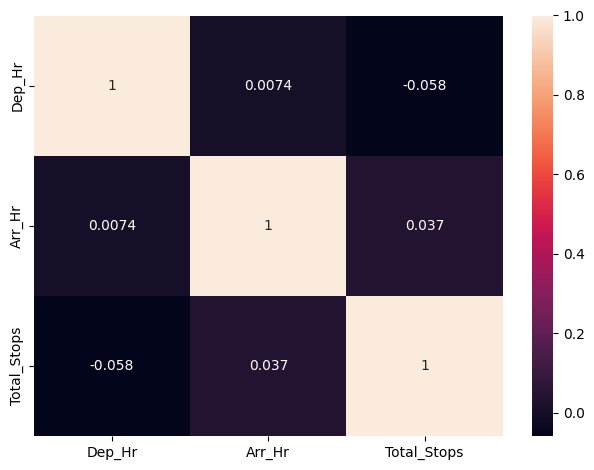

In [163]:
sns.heatmap(planes[["Dep_Hr","Arr_Hr","Total_Stops"]].corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()

No solid correlation observed for the above columns

### Creating categories based on ranges
Creating categories for ticket prices, i.e. Economy/ Premium Economy/ Business/ First Class based on **descriptive statistics** of the values in the price column
|Range         | Type            |
|-----         | ----            |
|>12242        | First Class     |
|>8452 < 12242 | Business Class  |
|>5228 < 8452  | Premium Economy |
|<5228         | Economy         |


In [167]:
planes["Price"].describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64